In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 8)
import heapq
pd.options.mode.chained_assignment = None  #

Populating the interactive namespace from numpy and matplotlib


/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [44]:
tuition=pd.read_excel('12s0293.xls')
tuition = tuition.iloc[:,:5]
tuition.columns = ['Year', 'All Institutions', '2 yr Colleges', '4 yr universities', 'Other 4 year Schools']
public_tuition = tuition.iloc[5:46,:]
public_tuition.index = np.arange(1970,2011,1)
private_tuition = tuition.iloc[48:89,:]
private_tuition.index = np.arange(1970,2011,1)

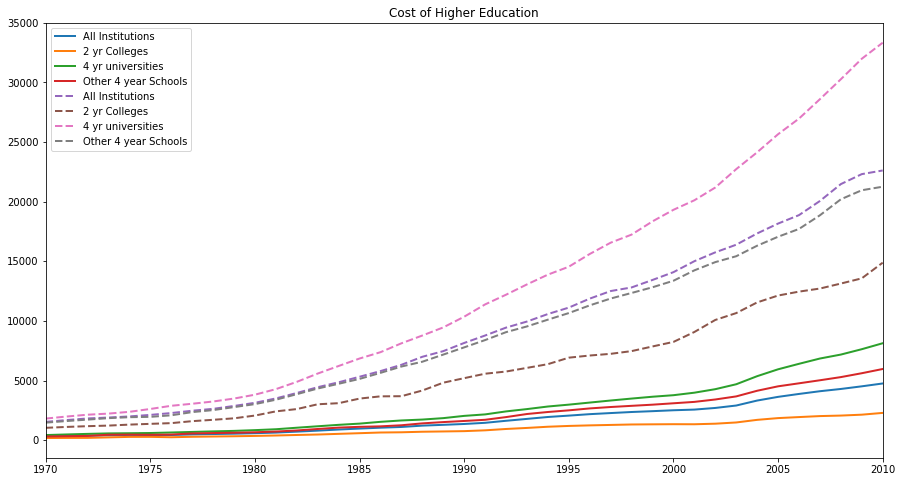

In [45]:
all_tuition= pd.concat([public_tuition,private_tuition.iloc[:,1:]], axis=1)
ax = public_tuition.plot(linewidth=2)
private_tuition.plot(ax=ax,linewidth=2, style='--')
plt.title('Cost of Higher Education')
plt.show()

In [46]:
#faculty salary 

In [47]:
college_salary = pd.read_excel('12s0295.xls')
college_salary = college_salary.iloc[0:14,:]
college_salary.drop(college_salary.index[[0,1,8]], inplace=True)
college_salary=college_salary.transpose()
for i in [2,3,4,5]:
    college_salary.iloc[0,i] = 'Public'+ str(college_salary.iloc[0,i])
for i in [7,8,9,10]:
    college_salary.iloc[0,i] = 'Private'+ str(college_salary.iloc[0,i])
college_salary[:1][2]='Year'
college_salary.columns=list(college_salary[:1].values.flatten())
college_salary.index = college_salary['Year']
college_salary.drop(college_salary.index[[0]], inplace=True)
del college_salary['Year']
college_salary

,Public: All ranks,Public..Professor,Public..Associate professor,Public..Assistant professor,Public..Instructor,Private: \1 All ranks,Private..Professor,Private..Associate professor,Private..Assistant professor,Private..Instructor
Year,,,,,,,,,,
2005.0,66.9,88.5,64.4,54.3,39.4,79.3,108.2,71,59.4,42.2
2006.0,68.4,91.4,66.3,55.9,40.1,81.5,111.8,73.3,61,44.5
2007.0,71.4,95.6,69.2,58.5,41.8,84.2,116.2,75.7,62.9,45.6
2008.0,73.2,98.3,72.2,60.8,43.4,88.2,122.2,79.2,65.8,49.9
2009.0,77,104.5,75.2,63.4,44.7,92.3,128.3,82.9,69,51.6
2010.0,78,105.7,75.7,64,46.5,92.9,128.7,82.9,69.5,52.8
2011.0,78.3,105.8,76.2,64.7,45.7,94.6,131.6,84.6,71,53.6


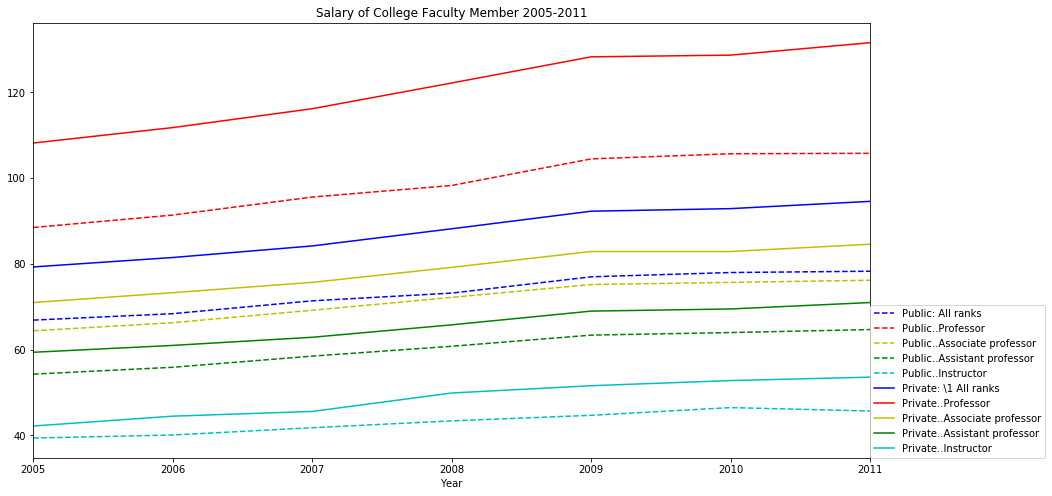

In [48]:
mystyle=['b--','r--','y--','g--','c--','b','r','y','g','c']
ax = college_salary.plot(style = mystyle)
plt.xticks( np.arange(7)+2005,   np.arange(7)+2005 )
ax.legend(loc=(1,0))
plt.title('Salary of College Faculty Member 2005-2011')
plt.show()

In [49]:
#Can see a up trend of abut 10% over the years

In [50]:
he_price_indexes = pd.read_excel('12s0290.xls')
he_price_indexes = he_price_indexes.iloc[:14,:]
he_price_indexes.drop(he_price_indexes.index[0:5], inplace=True)
he_price_indexes.columns=['Year','Total','Faculty Salaries', 'Administrative Salaries', 'Clerical Salaries',
                         'Service Employees Salaries', 'Fringe Benefits', 'Misc Services', 'Supplies', 'Utilities']
he_price_indexes.index=he_price_indexes['Year']
del he_price_indexes['Year']
he_price_indexes

,Total,Faculty Salaries,Administrative Salaries,Clerical Salaries,Service Employees Salaries,Fringe Benefits,Misc Services,Supplies,Utilities
Year,,,,,,,,,
2002,212.7,222.7,236.4,205.4,189.6,277.1,205.8,128.2,118.1
2003,223.5,229.4,255.7,211.1,193.9,292.3,209.5,132.2,157.6
2004,231.7,234.2,263.3,217.1,197.6,312.8,216.4,135.6,176.4
2005,240.8,240.7,274,223.4,201.4,327.2,222.7,145.5,200.2
2006,253.1,248.2,287.7,229.5,205.5,343.7,228.8,158.1,255.7
2007,260.3,257.6,299.2,237.7,213.6,360.8,238.3,165.3,220.6
2008,273.2,268.1,314,245,220.4,380.7,246.5,180,252
2009,279.3,277.3,330.9,251.6,226.7,394.4,253.1,181.6,213.8
2010,281.8,280.6,337.6,255.2,230,402.8,255.8,179.3,193.6


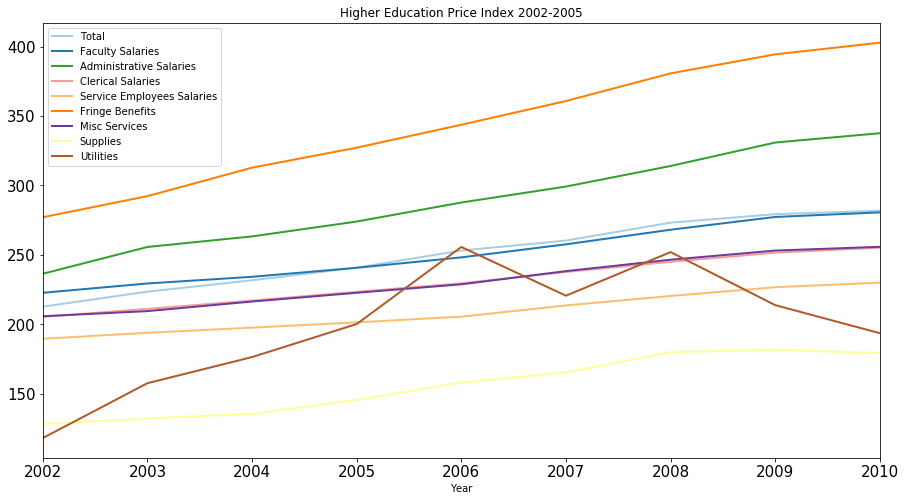

In [51]:
ax = he_price_indexes.plot(colormap='Paired',linewidth=2)
plt.xticks( fontsize=15 )
plt.yticks(fontsize=15)
ax.legend(loc='best')
plt.title('Higher Education Price Index 2002-2010')
plt.show()

In [52]:
#Federal support for Higher Education
#Apart from Federal Family Education Loans and Federal Perkins Loans, other types of Federal assistance all went up. Federal Direct Student Loan rose rapidly sevent times after 2008 and ballooned to 120 billion doll

In [53]:
a = pd.read_excel('12s0291.xls')
a.columns= list(a.iloc[2,:].values.flatten())
a.columns.values[12]='2010'
a.columns.values[13]='2011'

n_grants=a.iloc[19:28,:]
av_award=a.iloc[32:41,]

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


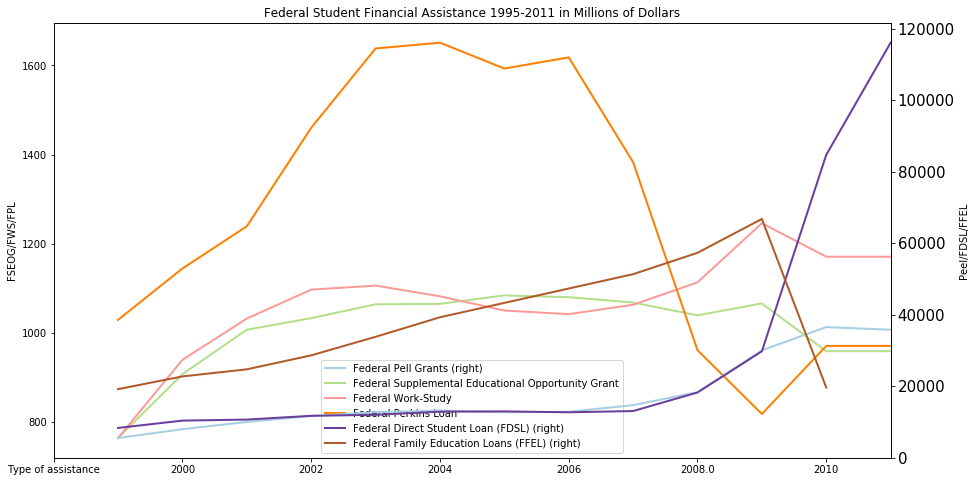

In [54]:
aid = a.iloc[6:15,:]
aid.drop(aid.index[[1,2,3]], inplace=True)
aid = aid.transpose()
aid.columns=list(aid[:1].values.flatten())
aid=aid.convert_objects(convert_numeric=True)
ax = aid.plot(colormap='Paired',linewidth=2,secondary_y=['Federal Pell Grants','Federal Direct Student Loan (FDSL)','Federal Family Education Loans (FFEL)'])
plt.xticks(fontsize=15 )
plt.yticks(fontsize=15)
ax.set_ylabel('FSEOG/FWS/FPL')
ax.right_ax.set_ylabel('Peel/FDSL/FFEL')
#ax.legend(loc=(0,0.6))
plt.title('Federal Student Financial Assistance 1995-2011 in Millions of Dollars')
plt.show()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


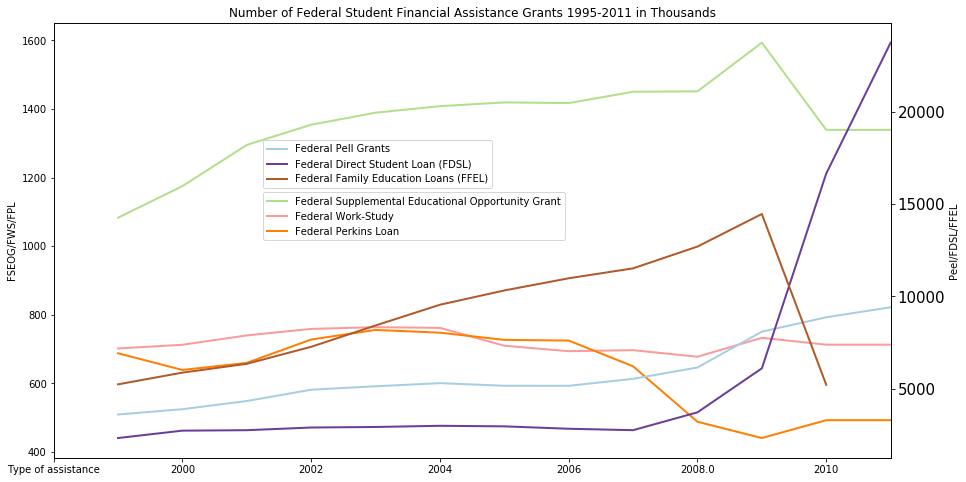

In [55]:
n_grants=a.iloc[19:28,:]
n_grants.drop(n_grants.index[[1,2,3]], inplace=True)
n_grants = n_grants.transpose()
n_grants.columns=list(n_grants[:1].values.flatten())
n_grants=n_grants.convert_objects(convert_numeric=True)
ax = n_grants.plot(colormap='Paired',linewidth=2,secondary_y=['Federal Pell Grants','Federal Direct Student Loan (FDSL)','Federal Family Education Loans (FFEL)'])
plt.xticks(fontsize=15 )
plt.yticks(fontsize=15)
ax.set_ylabel('FSEOG/FWS/FPL')
ax.right_ax.set_ylabel('Peel/FDSL/FFEL')
ax.legend(loc=(0.25,0.5))
ax.right_ax.legend(loc=(0.25,0.62))
plt.title('Number of Federal Student Financial Assistance Grants 1995-2011 in Thousands')
plt.show()

In [56]:
#the average size of all other types of loans went up.

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


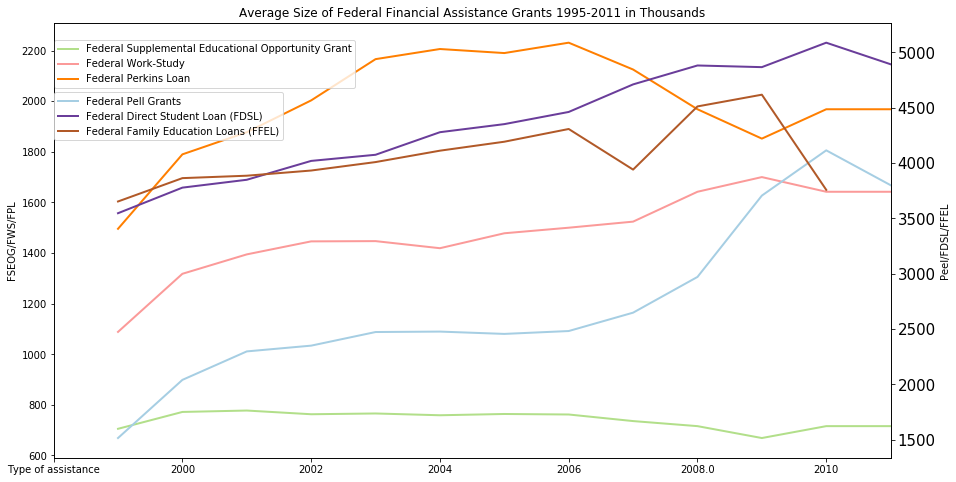

In [57]:
av_award=a.iloc[32:41,]
av_award.drop(av_award.index[[1,2,3]], inplace=True)
av_award = av_award.transpose()
av_award.columns=list(av_award[:1].values.flatten())
av_award=av_award.convert_objects(convert_numeric=True)
ax = av_award.plot(colormap='Paired',linewidth=2,secondary_y=['Federal Pell Grants','Federal Direct Student Loan (FDSL)','Federal Family Education Loans (FFEL)'])
plt.xticks(fontsize=15 )
plt.yticks(fontsize=15)
ax.set_ylabel('FSEOG/FWS/FPL')
ax.right_ax.set_ylabel('Peel/FDSL/FFEL')
ax.legend(loc=(0,0.85))
ax.right_ax.legend(loc=(0,0.73))
plt.title('Average Size of Federal Financial Assistance Grants 1995-2011 in Thousands')
plt.show()

In [58]:
#State support

In [59]:
a = pd.read_excel('12s0292.xls')
us_states=pd.read_csv('usa-states.csv')
a = a.convert_objects(convert_numeric=True)
a = a.iloc[:55, :]
a.drop(a.index[[0,1,2,3,4]], inplace=True)
a.columns=['State','Full-time Enrollments (thousands)', 'Educational Appropriations (millions $)', 'Education Appropriations per full time student',
          'Total State and Local Appropriations','Net Tuition', 'Net Tuition as Percent of Total Education Revenue']
state_investment = a
state_investment.head(5)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


,State,Full-time Enrollments (thousands),Educational Appropriations (millions $),Education Appropriations per full time student,Total State and Local Appropriations,Net Tuition,Net Tuition as Percent of Total Education Revenue
5,Alabama,203.976,1137.010562,5574.236979,0.139894,1111.065080,0.517576
6,Alaska,20.271,302.853868,14940.252972,0.030748,106.350885,0.259897
7,Arizona,251.574,1673.804800,6653.329835,0.085935,1254.323700,0.439761
8,Arkansas,121.359,705.599663,5814.151921,0.095598,451.541264,0.416807
9,California,1926.353,11683.824350,6065.256134,0.074323,3494.710000,0.230240


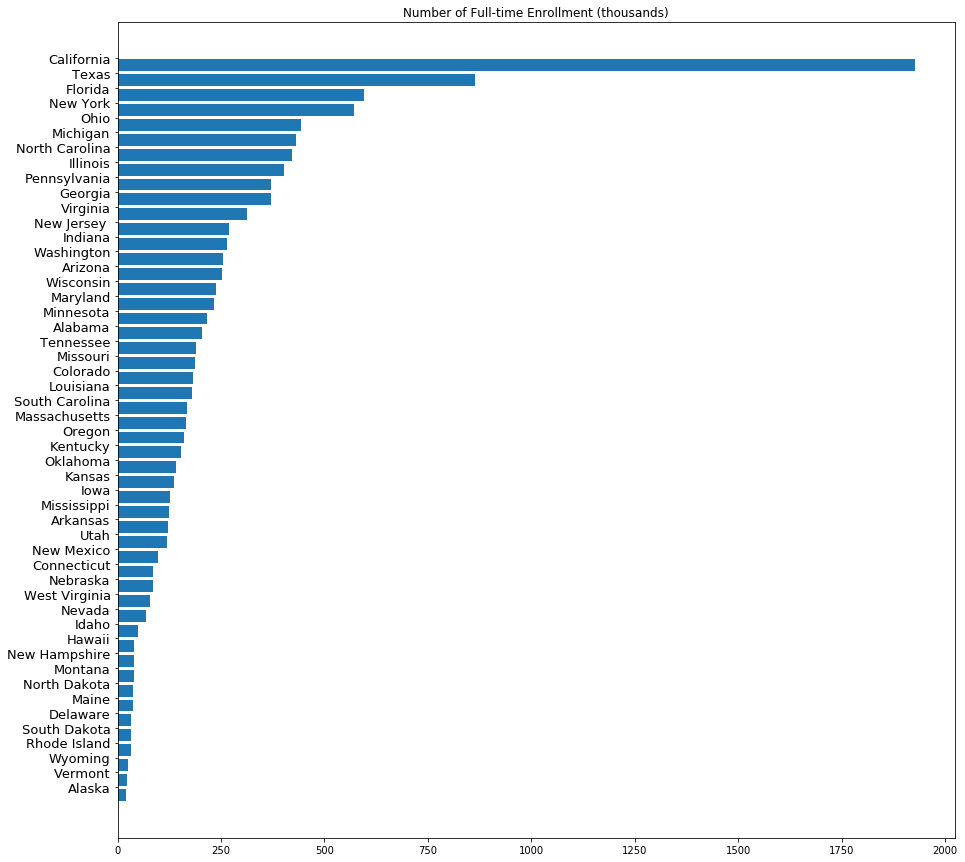

In [60]:
b = list(state_investment['Full-time Enrollments (thousands)'].astype(float))
ind= sorted(range(len(b)), key=lambda k: -b[k])
b.sort(reverse=True)
plt.figure(figsize=(15,15))
index=np.arange(50)
plt.barh([50-i for i in index], b)
plt.yticks([50-i+0.5 for i in index], [list(state_investment['State'])[i] for i in ind],fontsize = 13)
plt.title('Number of Full-time Enrollment (thousands)')
plt.show()

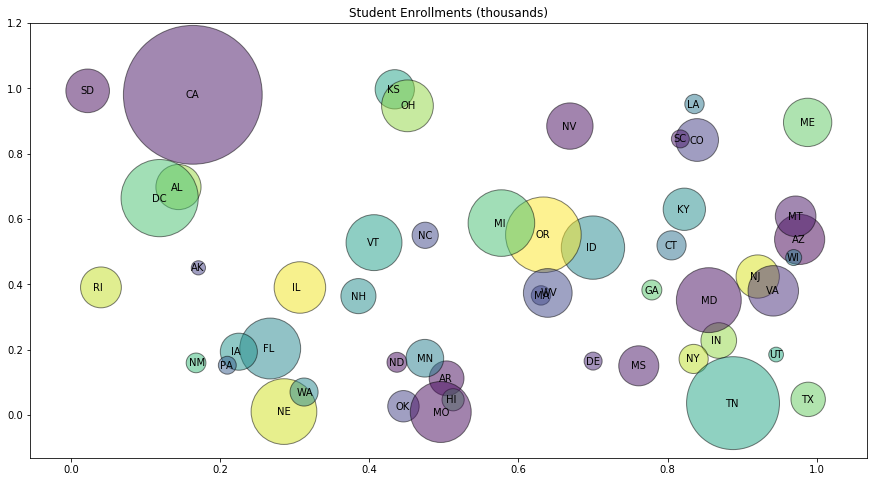

In [69]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.array(state_investment['Full-time Enrollments (thousands)'].astype(float))
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x, y, s=area*10  ,edgecolor='k', c=colors, alpha=0.5)
for i in arange(50):
    ax.annotate(us_states['StateCode'][i], xy=(x[i], y[i]), xytext=(x[i]-0.01, y[i]-0.01))
plt.title('Student Enrollments (thousands)')
plt.show()

In [82]:
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

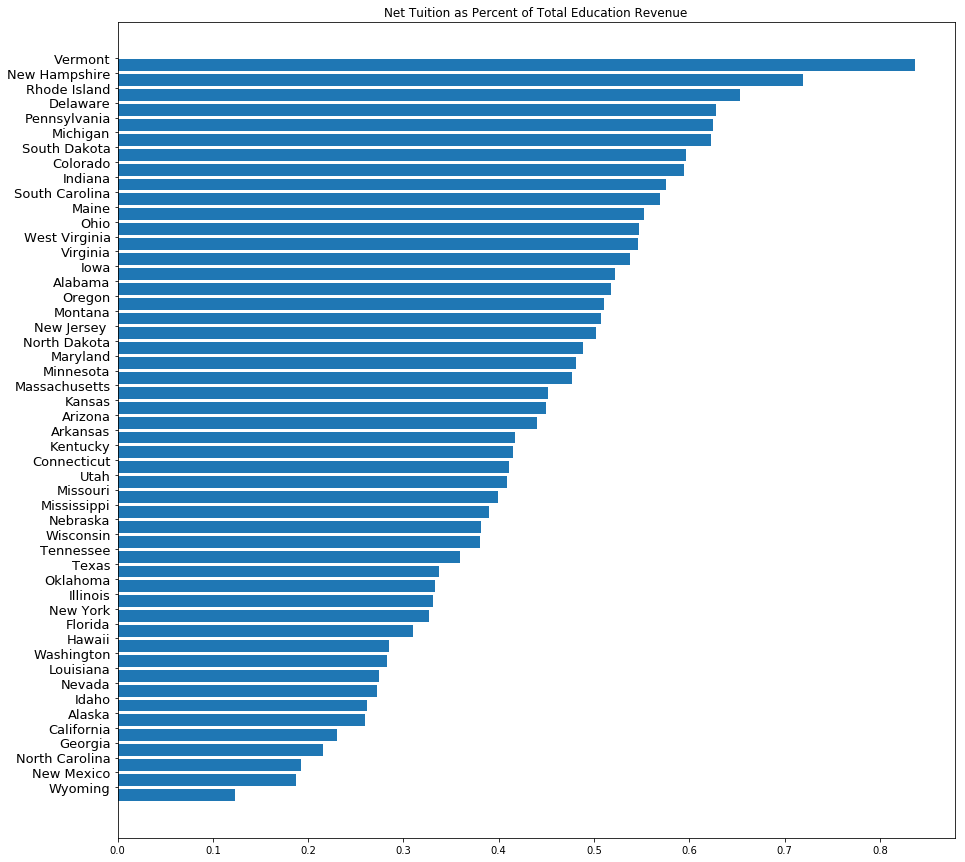

In [84]:
b = list(state_investment['Net Tuition as Percent of Total Education Revenue'].astype(float))
ind= sorted(range(len(b)), key=lambda k: -b[k])
b.sort(reverse=True)
plt.figure(figsize=(15,15))
plt.barh([50-i for i in index], b)
plt.yticks([50-i+0.5 for i in index], [list(state_investment['State'])[i] for i in ind],fontsize = 13)
plt.title('Net Tuition as Percent of Total Education Revenue')
plt.show()

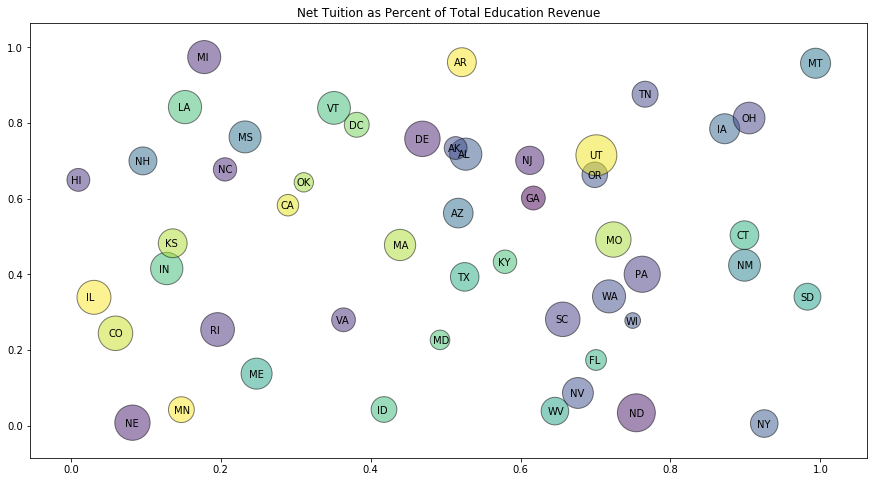

In [85]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.array(state_investment['Net Tuition as Percent of Total Education Revenue'].astype(float))
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x, y, s=area*2000  ,edgecolor='k', c=colors, alpha=0.5)
for i in arange(50):
    ax.annotate(us_states['StateCode'][i], xy=(x[i], y[i]), xytext=(x[i]-0.01, y[i]-0.01))
plt.title('Net Tuition as Percent of Total Education Revenue')
plt.show()